In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Two RVs

In [18]:
r1 = np.array([0.3,0.4,0.5,0.4,0.3,0.5,0.2,0.4,0.5]) / 100

In [19]:
r2 = np.array([1.2,-0.5,0.2,-0.3,1.0,-0.4,1.5,-0.1,0.9]) / 100

In [20]:
days = []
for i in range(1, 11):
    days.append('Day ' + str(i))

In [21]:
cumulative_r1 = [100]
for r in r1:
    cumulative_r1.append(cumulative_r1[-1] * (1+r))

In [22]:
cumulative_r2 = [100]
for r in r2:
    cumulative_r2.append(cumulative_r2[-1] * (1+r))

In [23]:
s1 = pd.Series(cumulative_r1, index=days)

In [24]:
s2 = pd.Series(cumulative_r2, index=days)

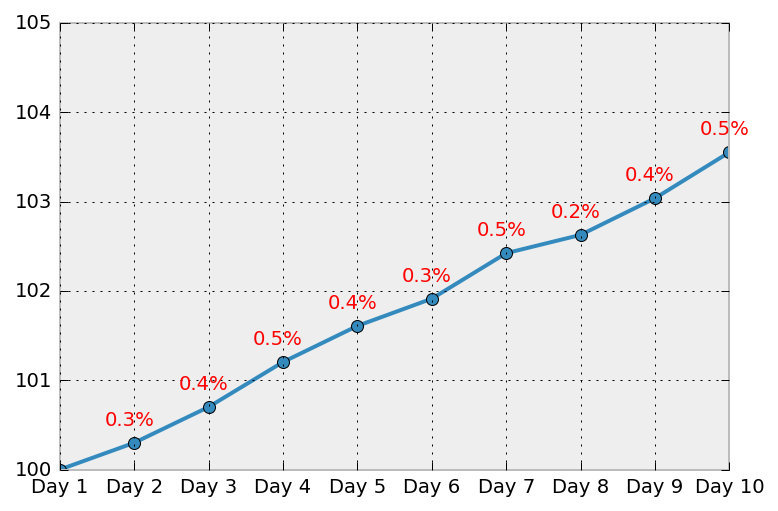

In [25]:
plt.style.use('bmh')
s1.plot(colormap='Greys')
plt.plot(s1.values, '-o')
plt.ylim(100,105)
for i in range(len(r1)):
    plt.text(i+0.6, s1.values[i+1]+0.2, str(r1[i]*100)+'%', color='red')
plt.savefig('h:/rv1.jpg')

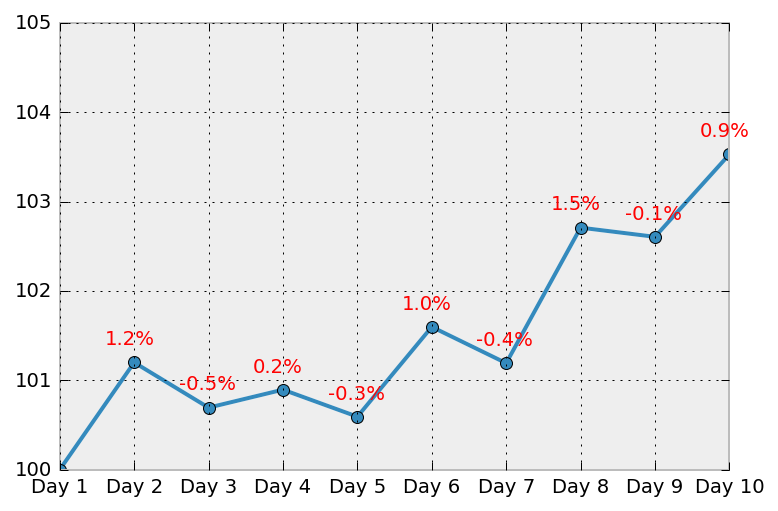

In [26]:
plt.style.use('bmh')
s2.plot(colormap='Greys')
plt.plot(s2.values, '-o')
plt.ylim(100,105)
for i in range(len(r2)):
    plt.text(i+0.6, s2.values[i+1]+0.2, str(r2[i]*100)+'%', color='red')
plt.savefig('h:/rv2.png')

In [27]:
r1.std(ddof=1) * np.sqrt(252)

0.016733200530681513

In [28]:
r2.std(ddof=1) * np.sqrt(252)

0.12153188881935476

## RV IV Example

In [29]:
directory = "h:/test_2005/"

trading_dates = pd.read_csv(directory + "trading_dates.csv", index_col=0)
trading_dates["MarketDate"] = pd.to_datetime(trading_dates["MarketDate"])

data = pd.read_csv(directory+"rolling_universe.csv", index_col=0)["Infocode"]
data.index = pd.to_datetime(data.index)
rolling_universe = {}
for key in data.index:
    rolling_universe[key] = np.array(data[key].split()).astype('int')
    
infocode_dict = pd.read_csv(directory + "infocode_dict.csv", index_col=0)["Ticker"].to_dict()

ticker_dict = pd.read_csv(directory + "ticker_dict.csv", index_col=0)["Infocode"].to_dict()

In [30]:
def read_stock_data(directory, name):
    stock_data = pd.read_csv(directory + name, index_col=0)
    stock_data.index = pd.to_datetime(stock_data.index)
    stock_data.columns = stock_data.columns.astype("int")
    return stock_data

In [31]:
stock_prices = read_stock_data(directory, 'stock_prices.csv')
stock_iv3m = read_stock_data(directory, 'stock_iv3m.csv')
stock_iv6m = read_stock_data(directory, 'stock_iv6m.csv')
stock_iv12m = read_stock_data(directory, 'stock_iv12m.csv')
stock_iv2m = read_stock_data(directory, 'stock_iv2m.csv')
stock_iv1m = read_stock_data(directory, 'stock_iv1m.csv')
stock_iv1m50delta = read_stock_data(directory, 'stock_iv1m50delta.csv')
stock_iv1m25delta = read_stock_data(directory, 'stock_iv1m25delta.csv')
stock_iv1m75delta = read_stock_data(directory, 'stock_iv1m75delta.csv')
stock_iv2m50delta = read_stock_data(directory, 'stock_iv2m50delta.csv')
stock_iv2m25delta = read_stock_data(directory, 'stock_iv2m25delta.csv')
stock_iv2m75delta = read_stock_data(directory, 'stock_iv2m75delta.csv')

In [32]:
stock_asset_per_equity = read_stock_data(directory, 'stock_asset_per_equity.csv')
stock_asset_per_marketcap = read_stock_data(directory, 'stock_asset_per_marketcap.csv')
stock_eps = read_stock_data(directory, 'stock_eps.csv')
stock_roe = read_stock_data(directory, 'stock_roe.csv')
stock_cps = read_stock_data(directory, 'stock_cps.csv')
stock_cpx_per_marketcap = read_stock_data(directory, 'stock_cpx_per_marketcap.csv')
stock_dps = read_stock_data(directory, 'stock_dps.csv')
stock_marketcap = read_stock_data(directory, 'stock_marketcap.csv')

In [33]:
trading_interval = 5
holding_period = 63

start_date = pd.to_datetime('20061001')
end_date = trading_dates["MarketDate"].iloc[-1]

rebalance_dates = []
valid_dates = trading_dates[(trading_dates["MarketDate"] >= start_date) & (trading_dates["MarketDate"] <= end_date)]
for i in range(0, len(valid_dates), trading_interval):
    rebalance_dates.append(valid_dates["MarketDate"].iloc[i])
    
trading_dates = list(pd.to_datetime(trading_dates["MarketDate"].values))

In [34]:
stock_returns = np.log(stock_prices/stock_prices.shift())

In [35]:
stock_rv1m = pd.rolling_std(stock_returns, 21) * np.sqrt(252)
stock_rv2m = pd.rolling_std(stock_returns, 42) * np.sqrt(252)
stock_rv3m = pd.rolling_std(stock_returns, 63) * np.sqrt(252)
stock_rv6m = pd.rolling_std(stock_returns, 126) * np.sqrt(252)
stock_rv12m = pd.rolling_std(stock_returns, 252) * np.sqrt(252)
stock_rv10d = pd.rolling_std(stock_returns, 10) * np.sqrt(252)

In [36]:
stock_delta1 = stock_prices - stock_prices.shift(1)
stock_gain = stock_delta1[stock_delta1>0]
stock_loss = np.abs(stock_delta1[stock_delta1<0])

def stock_rsi(N):
    return 100 * 1 / (1 + pd.rolling_mean(stock_loss, N, min_periods=0) / pd.rolling_mean(stock_gain, N, min_periods=0))

In [37]:
past_payoff = stock_rv3m - stock_iv3m.shift(63)

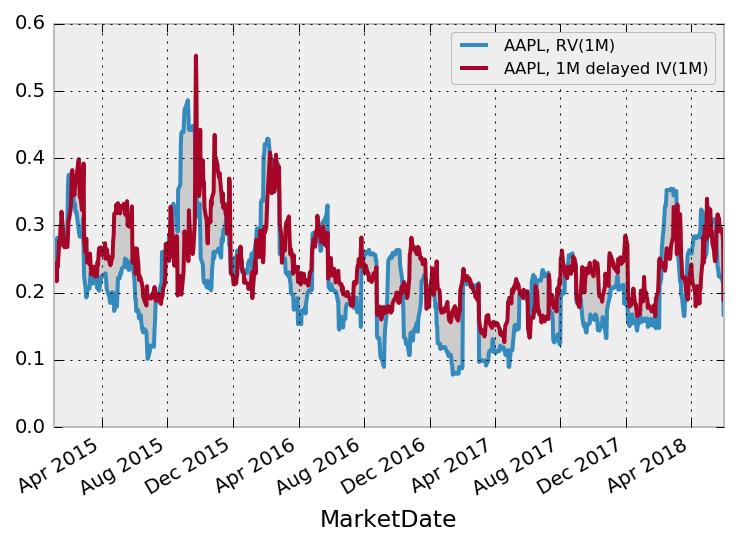

In [38]:
plt.style.use('bmh')
stock_rv1m[72990][pd.to_datetime('20150101'):].plot(label='AAPL, RV(1M)')
stock_iv1m[72990].shift(21)[pd.to_datetime('20150101'):].plot(label='AAPL, 1M delayed IV(1M)')
plt.fill_between(stock_rv1m[72990][pd.to_datetime('20150101'):].index, stock_rv1m[72990][pd.to_datetime('20150101'):].values, stock_iv1m[72990].shift(21)[pd.to_datetime('20150101'):].values, color='grey', alpha=0.3)
plt.legend(loc='upper right', frameon=True, fontsize='small')

## SPX and VIX

In [39]:
vix = pd.read_csv(directory + 'vix.csv', index_col=0)
vix = pd.Series(vix['vix'].values, index=pd.to_datetime(vix.index))

In [40]:
spx = pd.read_csv(directory + 'spx.csv', index_col=0)
spx = pd.Series(spx['spx'].values, index=pd.to_datetime(spx.index))

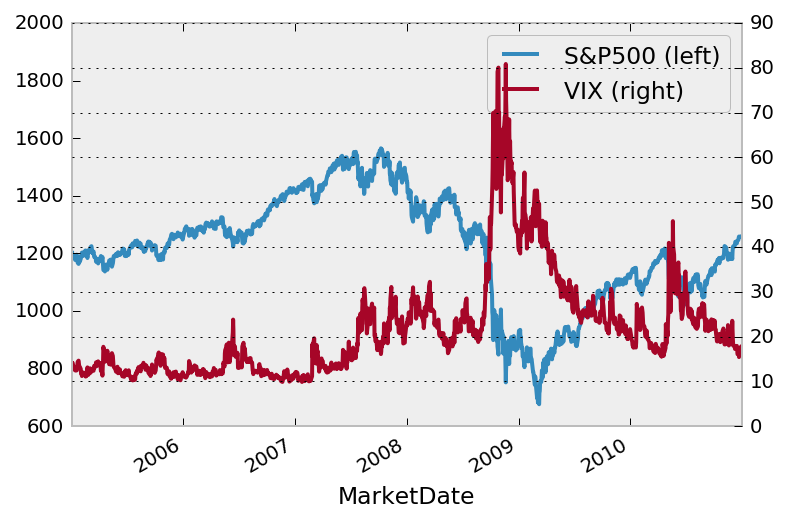

In [41]:
plt.ylim(600,2000)
#plt.plot(spx[:pd.to_datetime('20110101')], legend='spx')
spx[:pd.to_datetime('20110101')].plot(legend=True, label='S&P500 (left)')
vix[:pd.to_datetime('20110101')].plot(secondary_y=True,legend=True, label='VIX (right)', mark_right=False)

## Serial Correlation of RV

In [55]:
x_t = stock_rv3m[72990][pd.to_datetime('20100101'):]

In [56]:
rho = {}
for i in range(0, 300, 1):
    rho[i] = x_t.corr(x_t.shift(i))

In [57]:
rho_t = pd.Series(rho)

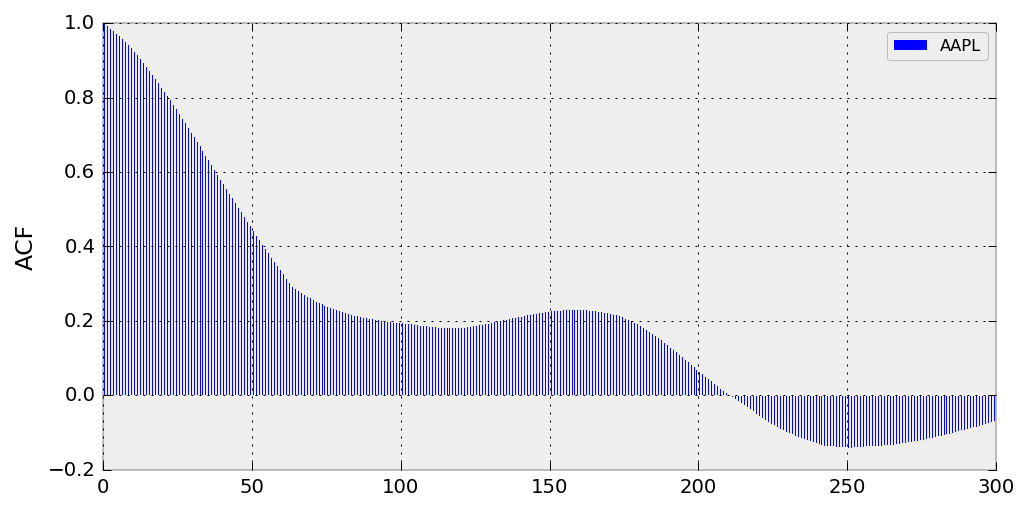

In [64]:
plt.figure(figsize=(8, 4))
plt.bar(rho_t.index, rho_t.values, width=0.67, label='AAPL')
plt.ylabel("ACF")
plt.legend(loc='upper right', fontsize='small')

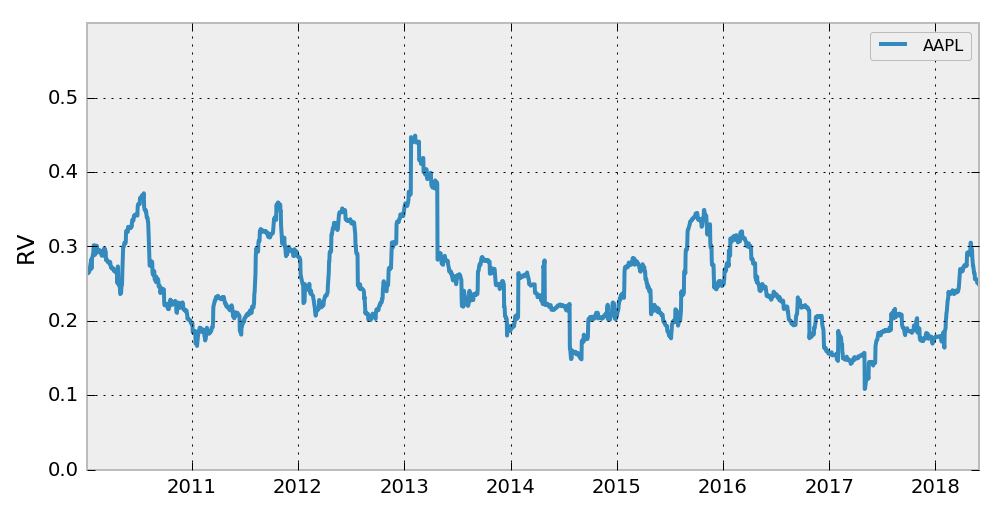

In [65]:
plt.figure(figsize=(8, 4))
plt.plot(x_t, label='AAPL')
plt.ylabel("RV")
plt.ylim(0, 0.6)
plt.legend(loc='upper right', fontsize='small')

## Cash Bollinger and RSI

In [47]:
aapl = stock_prices[72990][pd.to_datetime('20100101'):]

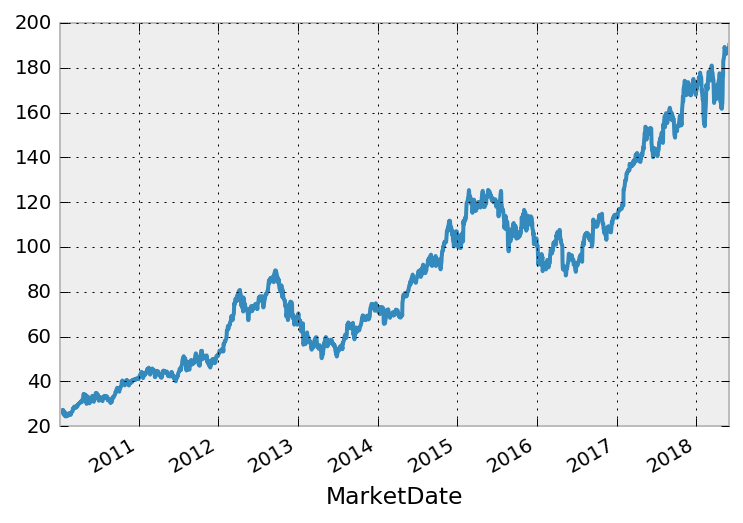

In [48]:
aapl.plot()

In [49]:
aapl_ma = pd.rolling_mean(aapl, 63)
aapl_std = pd.rolling_std(aapl, 63)

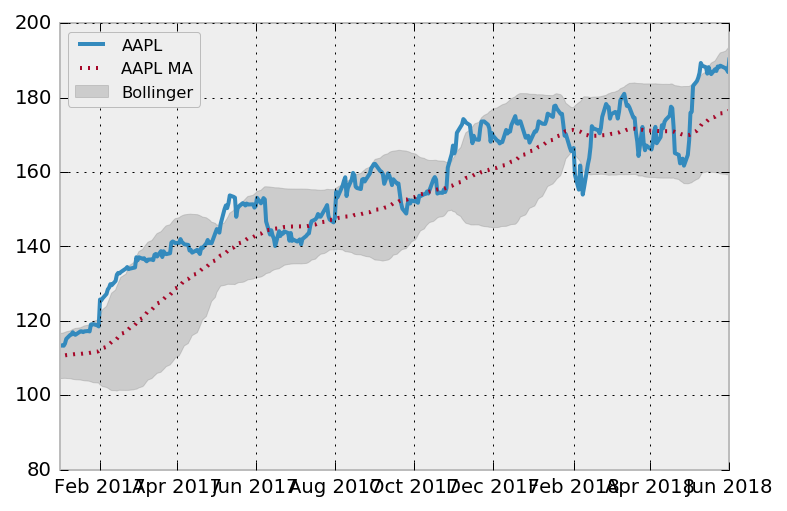

In [50]:
plt.plot(aapl, label='AAPL')
plt.plot(aapl_ma, ':', label='AAPL MA')
#plt.plot(aapl_ma + 2 * aapl_std, '--', color='grey')
#plt.plot(aapl_ma - 2 * aapl_std, '--', color='grey')
plt.fill_between(aapl_ma.index, aapl_ma+2*aapl_std, aapl_ma-2*aapl_std, color='grey', alpha=0.3, label='Bollinger')
plt.xlim(pd.to_datetime('20170101'), pd.to_datetime('20180601'))
plt.ylim(80,200)
plt.legend(loc='upper left', fontsize='small')

In [51]:
stock_delta1 = stock_prices - stock_prices.shift(1)
stock_gain = stock_delta1[stock_delta1>0]
stock_loss = np.abs(stock_delta1[stock_delta1<0])

def stock_rsi(N):
    return 100 * 1 / (1 + pd.rolling_mean(stock_loss, N, min_periods=0) / pd.rolling_mean(stock_gain, N, min_periods=0))

In [52]:
aapl_rsi = stock_rsi(21)[39988]

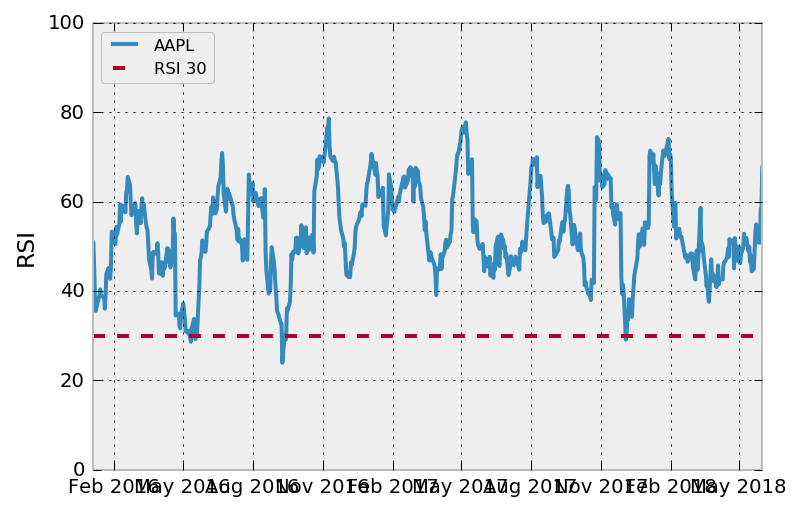

In [53]:
plt.plot(aapl_rsi[pd.to_datetime('20160101'):], label='AAPL')
plt.plot(aapl_rsi[pd.to_datetime('20160101'):].index, 30*np.ones(len(aapl_rsi[pd.to_datetime('20160101'):])), '--', label='RSI 30')
plt.ylim(0,100)
plt.ylabel('RSI')
plt.legend(loc='upper left', fontsize='small')

In [66]:
def backtest3m(score):
    daily_pnl = pd.Series(np.zeros(len(trading_dates)), index=trading_dates)
    for i in range(len(trading_dates)):
        date = trading_dates[i]
        #print date
        if (date in rebalance_dates) & (i + holding_period < len(trading_dates)):
            z = score.loc[date][rolling_universe[date]].dropna()
            z = (z-z.mean()) / z.std()
            z.sort(ascending=False)
            long_short = np.append(z.index[ : 1*len(z)/10], z.index[-(1*len(z)/10) : ])
            for infocode in long_short:
                if not np.isnan(stock_iv3m[infocode][date]):
                    daily_pnl[trading_dates[i+holding_period]] += np.sign(z[infocode]) * (stock_rv3m[infocode][trading_dates[i+holding_period]] - stock_iv3m[infocode][date])
    return daily_pnl


In [67]:
def get_z_score(stock_data):
    stock_data[stock_data == np.inf] = np.nan
    z_score = stock_data.sub(stock_data.mean(axis=1),axis=0).div(stock_data.std(axis=1),axis=0)
    return z_score

In [68]:
z_rviv13 = get_z_score(stock_rv1m - stock_iv3m)
z_ts63 = get_z_score(- stock_iv3m + stock_iv6m)
z_bol18 = get_z_score(np.abs((stock_prices - pd.rolling_mean(stock_prices, 378)) / pd.rolling_std(stock_prices, 378)))
z_rsi6 = get_z_score(-stock_rsi(126))
z_cpx = stock_cpx_per_marketcap
payoff = stock_rv3m.shift(-63) - stock_iv3m

In [69]:
def get_pnl(score):
    result = backtest3m(score)
    return result[result!=0]

In [70]:
pnl_rviv13 = get_pnl(z_rviv13)
pnl_ts63 = get_pnl(z_ts63)
pnl_bol18 = get_pnl(z_bol18)
pnl_rsi6 = get_pnl(z_rsi6)
pnl_cpx = get_pnl(z_cpx)

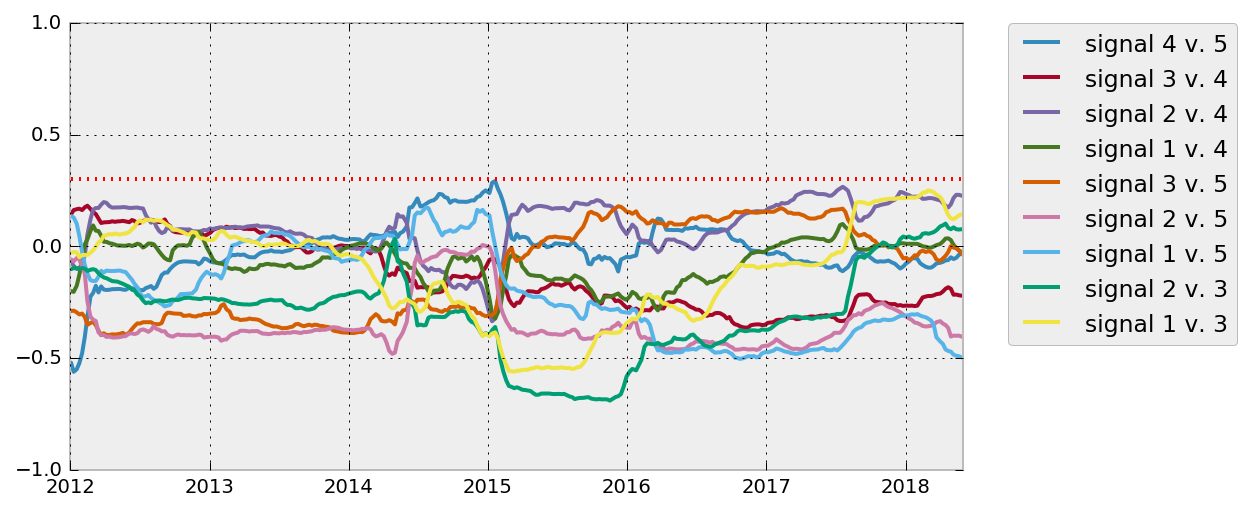

In [71]:
plt.figure(figsize=(8, 4))
plt.plot(pd.rolling_corr(pnl_rviv13, pnl_ts63, 126), label='signal 4 v. 5')
plt.plot(pd.rolling_corr(pnl_rviv13, pnl_bol18, 126), label='signal 3 v. 4')
plt.plot(pd.rolling_corr(pnl_rviv13, pnl_rsi6, 126), label='signal 2 v. 4')
plt.plot(pd.rolling_corr(pnl_rviv13, pnl_cpx, 126), label='signal 1 v. 4')
plt.plot(pd.rolling_corr(pnl_ts63, pnl_bol18, 126), label='signal 3 v. 5')
plt.plot(pd.rolling_corr(pnl_ts63, pnl_rsi6, 126), label='signal 2 v. 5')
plt.plot(pd.rolling_corr(pnl_ts63, pnl_cpx, 126), label='signal 1 v. 5')
plt.plot(pd.rolling_corr(pnl_bol18, pnl_rsi6, 126), label='signal 2 v. 3')
plt.plot(pd.rolling_corr(pnl_bol18, pnl_cpx, 126), label='signal 1 v. 3')
#plt.plot(pd.rolling_corr(pnl_rsi6, pnl_cpx, 126), label='signal 1 v. 2')
plt.plot(pnl_rviv13.index, 0.3*np.ones(len(pnl_rviv13)), ':', color='red')
plt.ylim(-1, 1)
plt.xlim(pd.to_datetime('20120101'), pd.to_datetime('20180601'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

